In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = "/home/cyberspartan/Documents/ML/placement.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
#tells about the shape of the columns
df.shape

(100, 4)

In [6]:
# tells about the information of the csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
# pre-processing (0-satge)
# here first colon represents all the rows get inserted and second '1:' represents we need results from 2nd column
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


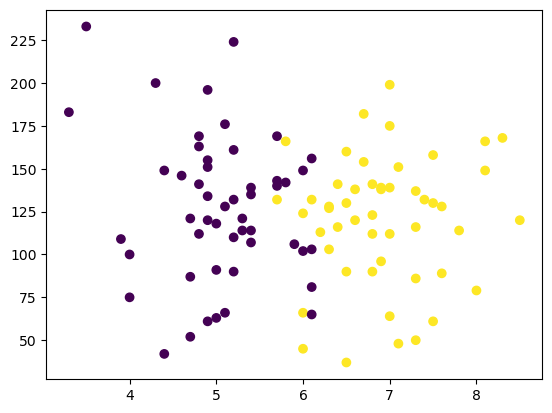

In [15]:
# EDA(Data Analysis) (0-stage)
# x-axis : CGPA y-axis : IQ and we are giving the color code for the column placement
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [9]:
# Extract input and ouput columns (1st Stage)
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [17]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [19]:
Y.shape

(100,)

In [32]:
# Train-Test split(2nd Stage)
from sklearn.model_selection import train_test_split
# Assuming X is your feature set and Y is your target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [33]:
X_train

,cgpa,iq
13,6.4,116.0
55,7.8,114.0
32,7.0,139.0
85,5.8,166.0
34,4.8,163.0
...,...,...
53,8.3,168.0
93,6.8,112.0
18,4.0,100.0
66,6.9,96.0


In [34]:
X_test

,cgpa,iq
50,3.5,233.0
31,3.9,109.0
9,5.1,66.0
56,6.1,65.0
23,4.7,87.0
10,6.0,45.0
70,6.3,127.0
95,4.3,200.0
64,7.0,64.0
21,7.1,151.0


In [35]:
Y_train

13    1
55    1
32    1
85    1
34    0
     ..
53    1
93    1
18    0
66    1
27    1
Name: placement, Length: 90, dtype: int64

In [36]:
Y_test

50    0
31    0
9     0
56    0
23    0
10    1
70    1
95    0
64    1
21    1
Name: placement, dtype: int64

In [15]:
# scale the values [-1,1] for the better precesion
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)


In [38]:
X_train

array([[ 0.30937628, -0.23337411],
       [ 1.5709106 , -0.28785834],
       [ 0.85003384,  0.39319451],
       [-0.23128129,  1.12873159],
       [-1.13237724,  1.04700525],
       [ 0.39948587,  0.96527891],
       [ 0.66981466, -0.94166907],
       [ 0.85003384, -0.34234257],
       [-1.04226765, -1.73169038],
       [ 0.12915709, -0.31510045],
       [ 0.66981466,  0.44767874],
       [-1.13237724,  1.21045793],
       [ 1.21047222,  0.20249971],
       [ 2.20167777, -0.12440565],
       [ 1.39069141, -0.96891119],
       [-0.59171967, -0.28785834],
       [-0.32139089,  0.50216297],
       [ 0.85003384,  1.37391062],
       [ 0.66981466, -0.04267931],
       [-1.04226765,  1.94599501],
       [ 1.12036263, -2.03135363],
       [ 1.75112979, -1.24133233],
       [-0.59171967,  0.39319451],
       [-1.04226765, -0.12440565],
       [-0.32139089,  1.21045793],
       [-1.22248684, -1.9768694 ],
       [-0.95215805, -0.91442696],
       [ 0.39948587, -0.94166907],
       [-0.1411717 ,

In [39]:
X_test = scaler.transform(X_test)

In [40]:
X_test

array([[-2.30380198,  2.95395323],
       [-1.9433636 , -0.42406891],
       [-0.86204846, -1.59547981],
       [ 0.03904749, -1.62272192],
       [-1.22248684, -1.02339542],
       [-0.0510621 , -2.1675642 ],
       [ 0.21926668,  0.06628914],
       [-1.58292522,  2.05496346],
       [ 0.85003384, -1.64996404],
       [ 0.94014344,  0.72009988]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
classifier = LogisticRegression()

In [41]:
classifier.fit(X_train,Y_train)

LogisticRegression()

In [44]:
Y_pred = classifier.predict(X_test)

In [43]:
Y_test

50    0
31    0
9     0
56    0
23    0
10    1
70    1
95    0
64    1
21    1
Name: placement, dtype: int64

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(Y_test,Y_pred)

0.9

In [50]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

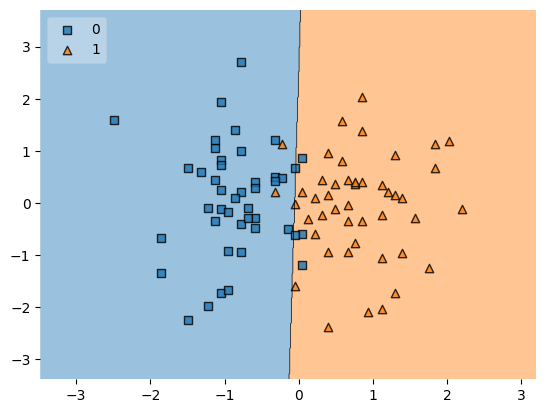

In [52]:
plot_decision_regions(X_train, Y_train.values, clf=classifier, legend=2)

In [53]:
import pickle

In [54]:
pickle.dump(classifier,open("LogisticRegression_Model.pkl","wb"))